<a href="https://colab.research.google.com/github/bioai96/Pytorch/blob/main/Pytorch_%ED%99%94%ED%95%A9%EB%AC%BC_%ED%8A%B9%EC%84%B1_%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#화합물 특성 분류모델 실습
BBB 막투과성 O, X 분류

In [ ]:
!pip install rdkit-pypi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 36.8 MB 1.2 MB/s 


### 1. 데이터 준비하기

In [ ]:
!wget https://s3-us-west-1.amazonaws.com/deepchem.io/datasets/molnet_publish/bbbp.zip
!ls
!unzip bbbp.zip

--2022-09-22 01:14:32--  https://s3-us-west-1.amazonaws.com/deepchem.io/datasets/molnet_publish/bbbp.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.192.72
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.192.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46174 (45K) [application/zip]
Saving to: ‘bbbp.zip’

bbbp.zip            100%[===================>]  45.09K  --.-KB/s    in 0.05s   

2022-09-22 01:14:32 (845 KB/s) - ‘bbbp.zip’ saved [46174/46174]

bbbp.zip  sample_data
Archive:  bbbp.zip
  inflating: BBBP.csv                
  inflating: BBBP_README             


In [ ]:
import pandas as pd 

data = pd.read_csv("BBBP.csv")
data

,num,name,p_np,smiles
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...
...,...,...,...,...
2045,2049,licostinel,1,C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl
2046,2050,ademetionine(adenosyl-methionine),1,[C@H]3([N]2C1=C(C(=NC=N1)N)N=C2)[C@@H]([C@@H](...
2047,2051,mesocarb,1,[O+]1=N[N](C=C1[N-]C(NC2=CC=CC=C2)=O)C(CC3=CC=...
2048,2052,tofisoline,1,C1=C(OC)C(=CC2=C1C(=[N+](C(=C2CC)C)[NH-])C3=CC...


In [ ]:
data['p_np'].value_counts()

1    1567
0     483
Name: p_np, dtype: int64

#### SMILES ==> Finger Print

In [ ]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
import numpy as np

In [ ]:
idxs=[]
for i, smiles in enumerate(data["smiles"]):
    mol = Chem.MolFromSmiles(smiles)
    if (mol == None) :
        print(i,mol)
        idxs.append(i)

59 None
61 None
391 None
614 None
642 None
645 None
646 None
647 None
648 None
649 None
685 None


In [ ]:
# mol
Chem.MolFromSmiles(data.loc[60]['smiles'])

In [ ]:
data = data.drop(idxs, axis= 0)

In [ ]:
fps = []
for i, smiles in enumerate(data["smiles"]):
    mol = Chem.MolFromSmiles(smiles)
    arr = np.zeros((1,))
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2048)
    DataStructs.ConvertToNumpyArray(fp, arr)

    fps.append(fp)

data['fp'] = fps
data

,num,name,p_np,smiles,fp
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12,"[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, ..."
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ..."
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...
2045,2049,licostinel,1,C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2046,2050,ademetionine(adenosyl-methionine),1,[C@H]3([N]2C1=C(C(=NC=N1)N)N=C2)[C@@H]([C@@H](...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2047,2051,mesocarb,1,[O+]1=N[N](C=C1[N-]C(NC2=CC=CC=C2)=O)C(CC3=CC=...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2048,2052,tofisoline,1,C1=C(OC)C(=CC2=C1C(=[N+](C(=C2CC)C)[NH-])C3=CC...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


### 2. 훈련 데이터, 테스트 데이터 분할하기

In [ ]:
from sklearn.model_selection import train_test_split

train_val, test = train_test_split(data, test_size=0.1, random_state=42)
train, val = train_test_split(train_val, test_size=0.1/0.9, random_state=42)

datasets = {
    "train" : train,
    "val" : val,
    "test" : test
}

datasets

### 3. 커스텀 데이터세트 만들기

In [ ]:
import torch
from torch.utils.data import Dataset

class bbbpDataset(Dataset):

    def __init__(self, df):
        self.x = list(df["fp"])
        self.y = list(df["p_np"].values)

    def __len__(self):
        return len(self.x)
    # 이진분류, 다중 클래스 분류
    # sigmoid, softmax
    # logBCE, CE
    # x,y
    # tensor.float, tensor.float, tensor.float, tensor.Long(int64)

    def __getitem__(self, index):
        return torch.tensor(self.x[index]).float(), torch.tensor(self.y[index]).float()

bbbpdata = {
    "train": bbbpDataset(datasets["train"]),
    "val": bbbpDataset(datasets["val"]),
    "test": bbbpDataset(datasets["test"])
}

bbbpdata


{'train': <__main__.bbbpDataset at 0x7fbfe4799a90>,
 'val': <__main__.bbbpDataset at 0x7fbfe4799b90>,
 'test': <__main__.bbbpDataset at 0x7fbfe47d7510>}

In [ ]:
from torch.utils.data import DataLoader

bbbp_dataloaders = {
    "train" : DataLoader(bbbpdata["train"], batch_size=32, shuffle = True),
    "val" : DataLoader(bbbpdata["val"], batch_size=32, shuffle = False),
    "test" : DataLoader(bbbpdata["test"], batch_size=32, shuffle = False)
}

bbbp_dataloaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7fbfe4799210>,
 'val': <torch.utils.data.dataloader.DataLoader at 0x7fbfe4799390>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7fbfe4799650>}

In [ ]:
for data in bbbp_dataloaders["train"]:
    x, y = data
    print(x.shape, y.shape)



### 4. 모델 만들기

In [ ]:
import torch
from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
class bbbp_MLP(nn.Module):
    def __init__(self):
        super(bbbp_MLP, self).__init__()
        self.linear1 = nn.Linear(2048,1024) # 완전 연결된 단순 레이어 만들기 
        self.linear2 = nn.Linear(1024, 256)
        self.output = nn.Linear(256,1) # 최종 예측을 위해 출력 부 크기 1로 설정
        self.dropout1 = nn.Dropout(0.5) #일반화를 위한 Dropout
        self.relu = nn.ReLU()

    def forward(self,x) :
        out = self.linear1(x)
        out = self.dropout1(out)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.dropout1(out)
        out = self.relu(out)
        out = self.output(out)
        return out
model = bbbp_MLP()
model.to(device) 


bbbp_MLP(
  (linear1): Linear(in_features=2048, out_features=1024, bias=True)
  (linear2): Linear(in_features=1024, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=1, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (relu): ReLU()
)

### 5. 손실 및 최적화 함수 설정

In [ ]:
import torch.optim as optim

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.1)

def acc_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

### 6. 모델 학습하기

In [ ]:
torch.manual_seed(42)

epochs = 101

train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(epochs):
    model.train()
    epoch_train_loss = 0.0

    for i, data in enumerate(bbbp_dataloaders["train"]):
        x,y = data[0], data[1]
        optimizer.zero_grad()

        outputs = model(x)
        train_loss = loss_fn(outputs, y.view(-1,1))
        train_acc = acc_fn(torch.round(torch.sigmoid(outputs)), y.view(-1,1))
        train_loss.backward()
        optimizer.step()

        epoch_train_loss += train_loss.item()

    model.eval()
    epoch_val_loss = 0.0
    with torch.inference_mode():
        for i, data in enumerate(bbbp_dataloaders["val"]):
            x,y = data[0].to(device), data[1].to(device)

            outputs = model(x)
            val_loss = loss_fn(outputs, y.view(-1,1))
            val_acc= acc_fn(torch.round(torch.sigmoid(outputs)), y.view(-1,1))
            epoch_val_loss += val_loss.item()

        epoch_train_loss /= len(bbbp_dataloaders['train'])
        epoch_val_loss /= len(bbbp_dataloaders['val'])
        train_losses.append(epoch_train_loss)
        val_losses.append(epoch_val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)

        if epoch % 10 == 0:
            print("[Epoch %d] Train Loss: %.3f Train acc: %.3f Validation Loss: %.3f Validation acc : %.3f" %
                  (epoch, epoch_train_loss, train_acc, epoch_val_loss, val_acc))

  


[Epoch 0] Train Loss: 0.488 Train acc: 67.742 Validation Loss: 0.438 Validation acc : 91.667
[Epoch 10] Train Loss: 0.044 Train acc: 100.000 Validation Loss: 0.527 Validation acc : 75.000
[Epoch 20] Train Loss: 0.017 Train acc: 100.000 Validation Loss: 0.678 Validation acc : 75.000
[Epoch 30] Train Loss: 0.015 Train acc: 100.000 Validation Loss: 0.732 Validation acc : 75.000
[Epoch 40] Train Loss: 0.008 Train acc: 100.000 Validation Loss: 0.803 Validation acc : 75.000
[Epoch 50] Train Loss: 0.006 Train acc: 100.000 Validation Loss: 0.789 Validation acc : 75.000
[Epoch 60] Train Loss: 0.007 Train acc: 100.000 Validation Loss: 0.836 Validation acc : 75.000
[Epoch 70] Train Loss: 0.010 Train acc: 100.000 Validation Loss: 0.849 Validation acc : 75.000
[Epoch 80] Train Loss: 0.006 Train acc: 100.000 Validation Loss: 0.882 Validation acc : 75.000
[Epoch 90] Train Loss: 0.005 Train acc: 100.000 Validation Loss: 0.920 Validation acc : 75.000
[Epoch 100] Train Loss: 0.005 Train acc: 100.000 Val

### 7. 결과 리포팅하기

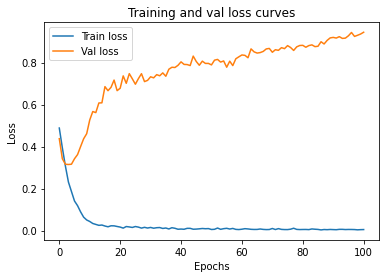

In [ ]:
import matplotlib.pyplot as plt 

epoch_count = range(epochs)
plt.plot(epoch_count, train_losses, label = "Train loss")
plt.plot(epoch_count, val_losses, label="Val loss")
plt.title("Training and val loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

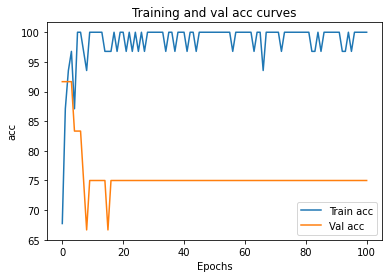

In [ ]:
epoch_count = range(epochs)
plt.plot(epoch_count, train_accs, label="Train acc")
plt.plot(epoch_count, val_accs, label="Val acc")
plt.title("Training and val acc curves")
plt.ylabel("acc")
plt.xlabel("Epochs")
plt.legend();